In [1]:
import ast
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/data/df_train2.csv')
df_anot = pd.read_csv('/data/train_annotations.csv')
df_bifurcation = pd.read_csv('/data/additional/RANZCR_CLiP_tracheal_bifurcation.csv')

In [3]:
ast.literal_eval(df_bifurcation.tracheal_bifurcation[0])

[850, 989]

In [4]:
normal_uid = df.loc[df['ETT - Normal']==1,'StudyInstanceUID'].tolist()
abnormal_uid = df.loc[df['ETT - Abnormal']==1,'StudyInstanceUID'].tolist()

<AxesSubplot:>

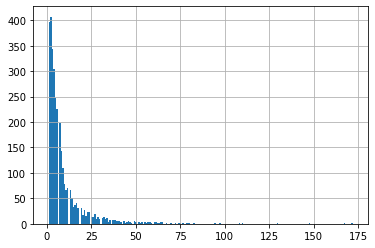

In [40]:
df.PatientID.value_counts().hist(bins=200)

In [10]:
df_anot.label.unique()

array(['CVC - Normal', 'CVC - Borderline', 'NGT - Normal', 'ETT - Normal',
       'NGT - Incompletely Imaged', 'CVC - Abnormal', 'ETT - Borderline',
       'Swan Ganz Catheter Present', 'NGT - Borderline', 'NGT - Abnormal',
       'ETT - Abnormal'], dtype=object)

In [17]:
df_anot.label.value_counts()

CVC - Normal                  7437
CVC - Borderline              2986
ETT - Normal                  2536
NGT - Normal                  1870
CVC - Abnormal                1206
NGT - Incompletely Imaged     1019
ETT - Borderline               428
NGT - Borderline               219
Swan Ganz Catheter Present     157
NGT - Abnormal                 111
ETT - Abnormal                  30
Name: label, dtype: int64

In [6]:
df_anot.StudyInstanceUID.unique()

array(['1.2.826.0.1.3680043.8.498.12616281126973421762775197134528405307',
       '1.2.826.0.1.3680043.8.498.72921907356394389969069434057117070831',
       '1.2.826.0.1.3680043.8.498.11697104485452001927211929869950495038',
       ...,
       '1.2.826.0.1.3680043.8.498.66774579023475418162888677784385387033',
       '1.2.826.0.1.3680043.8.498.18560506324214035535556371154113749001',
       '1.2.826.0.1.3680043.8.498.98119637144473510638072955005700194204'],
      dtype=object)

In [16]:
len(df_anot.StudyInstanceUID.unique())

9095

In [19]:
df_anot.shape

(17999, 3)

In [20]:
df_bifurcation.shape

(30083, 2)

In [12]:
df.columns[1:12]

Index(['ETT - Abnormal', 'ETT - Borderline', 'ETT - Normal', 'NGT - Abnormal',
       'NGT - Borderline', 'NGT - Incompletely Imaged', 'NGT - Normal',
       'CVC - Abnormal', 'CVC - Borderline', 'CVC - Normal',
       'Swan Ganz Catheter Present'],
      dtype='object')

In [13]:
df["is_catheter"] = df[df.columns[1:12]].max(1)

In [15]:
df.is_catheter.value_counts()

1    30059
0       24
Name: is_catheter, dtype: int64

In [25]:
df.PatientID.unique()

array(['ec89415d1', 'bf4c6da3c', '3fc1c97e5', ..., 'dfb9e08b4',
       'a574cb09f', 'f46237081'], dtype=object)

In [27]:
df[df.PatientID == df.PatientID.unique()[0]]

,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID,fold,img_path,cv,is_catheter
0,1.2.826.0.1.3680043.8.498.26697628953273228189...,0,0,0,0,0,0,1,0,0,0,0,ec89415d1,3,/data/train512/1.2.826.0.1.3680043.8.498.26697...,3,1
14759,1.2.826.0.1.3680043.8.498.13669042249425506984...,0,0,0,0,0,0,1,0,1,0,0,ec89415d1,3,/data/train512/1.2.826.0.1.3680043.8.498.13669...,3,1
17788,1.2.826.0.1.3680043.8.498.12069601668869166279...,0,0,0,0,0,1,0,0,0,1,0,ec89415d1,3,/data/train512/1.2.826.0.1.3680043.8.498.12069...,3,1
25311,1.2.826.0.1.3680043.8.498.76602365606870209106...,0,0,0,0,1,0,0,0,1,0,0,ec89415d1,3,/data/train512/1.2.826.0.1.3680043.8.498.76602...,3,1
26869,1.2.826.0.1.3680043.8.498.58735051192792195566...,0,0,0,0,0,0,0,0,1,0,0,ec89415d1,3,/data/train512/1.2.826.0.1.3680043.8.498.58735...,3,1
29077,1.2.826.0.1.3680043.8.498.34482941866634300538...,0,0,0,0,0,0,0,1,0,0,0,ec89415d1,3,/data/train512/1.2.826.0.1.3680043.8.498.34482...,3,1


In [32]:
df_pat0 = df[df.PatientID == df.PatientID.unique()[2]]
df_pat0

,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID,fold,img_path,cv,is_catheter
2,1.2.826.0.1.3680043.8.498.23819260719748494858...,0,0,0,0,0,0,0,0,1,0,0,3fc1c97e5,3,/data/train512/1.2.826.0.1.3680043.8.498.23819...,3,1
9944,1.2.826.0.1.3680043.8.498.71892254175370025258...,0,0,0,0,0,0,0,0,0,1,0,3fc1c97e5,3,/data/train512/1.2.826.0.1.3680043.8.498.71892...,3,1
10912,1.2.826.0.1.3680043.8.498.83571603595216819425...,0,0,0,0,0,0,0,0,1,0,0,3fc1c97e5,3,/data/train512/1.2.826.0.1.3680043.8.498.83571...,3,1
22284,1.2.826.0.1.3680043.8.498.10519357295420963066...,0,0,0,0,0,0,0,0,0,1,0,3fc1c97e5,3,/data/train512/1.2.826.0.1.3680043.8.498.10519...,3,1
26939,1.2.826.0.1.3680043.8.498.97399538068705390096...,0,0,0,0,0,0,0,0,1,0,0,3fc1c97e5,3,/data/train512/1.2.826.0.1.3680043.8.498.97399...,3,1
28061,1.2.826.0.1.3680043.8.498.37394933280732664620...,0,0,0,0,0,0,0,0,0,1,0,3fc1c97e5,3,/data/train512/1.2.826.0.1.3680043.8.498.37394...,3,1


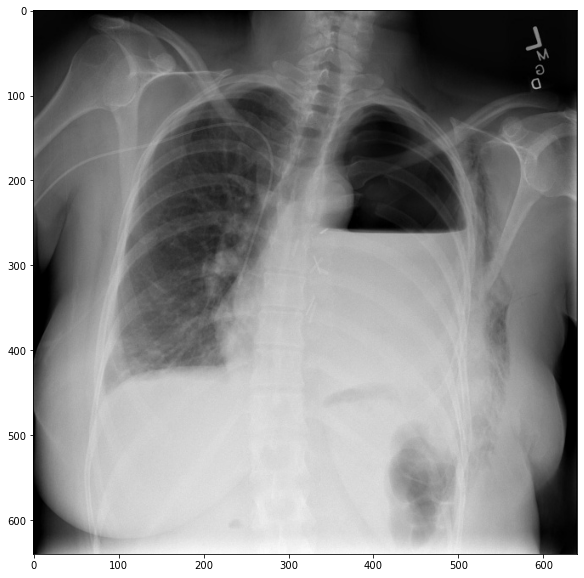

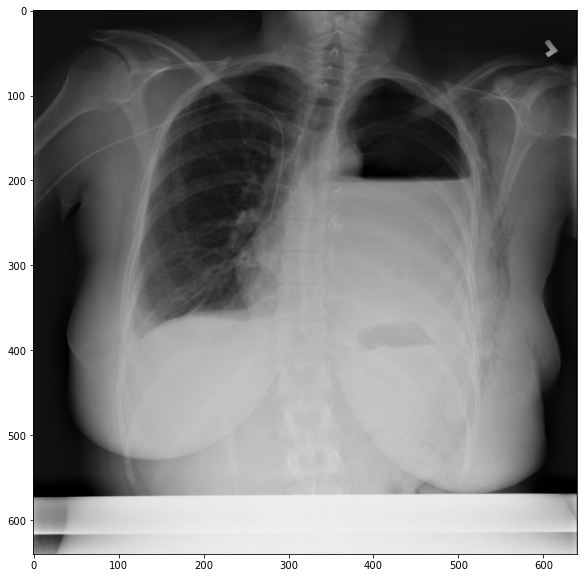

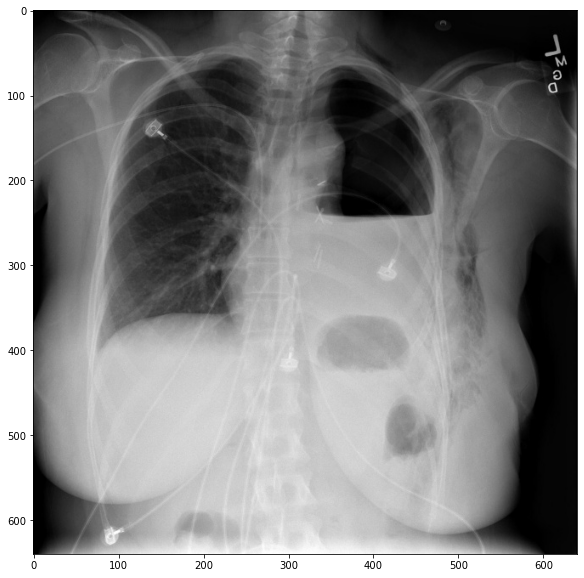

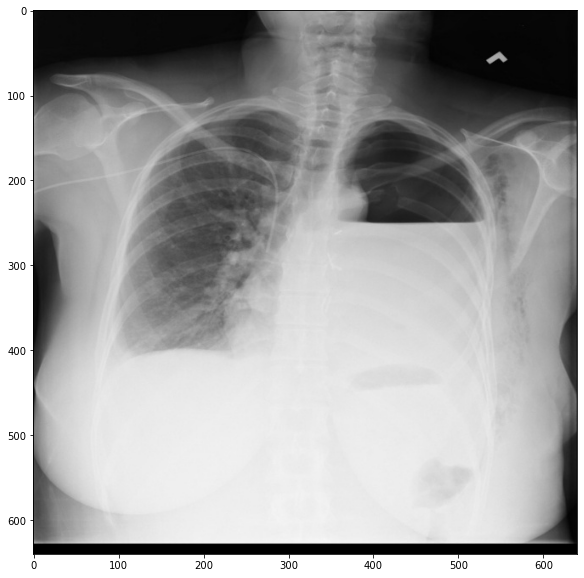

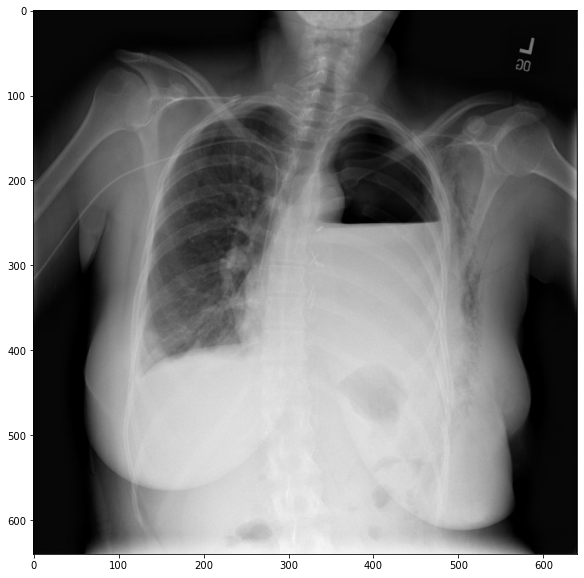

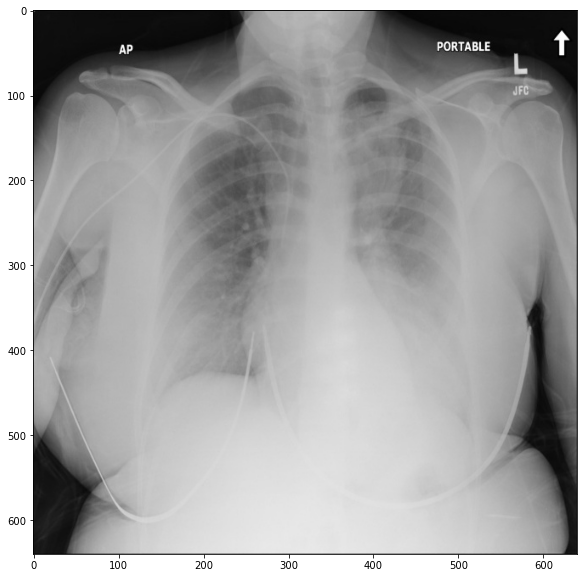

In [38]:
for i in range(len(df_pat0)):
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.imread(df_pat0.img_path.iloc[i]))
plt.show()

In [34]:
pat_list = [set(df[df.cv == i].PatientID.unique()) for i in range(5)]

In [36]:
pat_list[0] & pat_list[1]

set()

In [37]:
pat_list[0] & pat_list[2]

set()

In [42]:
cvc_cols = ["CVC - Abnormal", "CVC - Borderline", "CVC - Normal"]

In [43]:
df["is_cvc"] = df[cvc_cols].max(1)

In [46]:
df.is_cvc.value_counts()

1    29333
0      750
Name: is_cvc, dtype: int64